# Introduction

The primary goal of this project is to develop a predictive model using Multiple Linear Regression (MLR) to analyze factors that influence the cost of insurance premiums. This model will help in understanding the key drivers of insurance costs and enable consumers to estimate their premiums at any given point. By leveraging data on various attributes of policyholders, we aim to build a robust model that can provide accurate predictions and actionable insights.

## Objectives

>**Data Exploration**
>>Analyze the dataset to understand the distribution and relationships between different features such as age, gender, BMI, smoking status, and region.

>**Model Development**
>>Build and compare multiple models, starting with a baseline model, followed by an un-tuned model, and finally a tuned/optimized model to predict insurance premiums.

>**Model Evaluation**
>>Assess the performance of the models using appropriate metrics such as Mean Squared Error (MSE) and goodness of fit. Investigate whether the assumptions of linearity are met.

## Data understanding

Data source can be found [here](https://www.kaggle.com/datasets/sridharstreaks/insurance-data-for-machine-learning)

includes various factors influencing medical costs and insurance premiums. It contains information on the age, gender, BMI, number of children, smoking status, and region of the policyholders. Additionally, it includes details about the policyholders’ medical history, family medical history, exercise frequency, occupation, and coverage level. 

The target variable in this dataset is the insurance charges. By exploring these variables, we aim to uncover patterns and relationships that can help in predicting insurance costs accurately. This understanding will form the basis for our predictive modeling efforts, enabling us to build a robust Multiple Linear Regression (MLR) model to estimate insurance premiums.

## Libraries and Data importation

In [42]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.stats import chi2_contingency
from seaborn import load_dataset
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Plotting style
plt.style.use('ggplot')

In [3]:
# Read data using pandas

df = pd.read_csv('insurance_dataset.csv')
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [4]:
# Information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010282 entries, 0 to 1010281
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1010282 non-null  int64  
 1   gender                  1010282 non-null  object 
 2   bmi                     1010282 non-null  float64
 3   children                1010282 non-null  int64  
 4   smoker                  1010282 non-null  object 
 5   region                  1010282 non-null  object 
 6   medical_history         756989 non-null   object 
 7   family_medical_history  757268 non-null   object 
 8   exercise_frequency      1010282 non-null  object 
 9   occupation              1010282 non-null  object 
 10  coverage_level          1010282 non-null  object 
 11  charges                 1010282 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 92.5+ MB


In [6]:
#Drop duplicated rows
df.drop_duplicates(inplace=True)

## Data Exploration

In this section, we will explore the relationships between various features in our dataset and the insurance charges. 

By visualizing the data, we can uncover patterns and insights that might not be immediately apparent from the raw data alone. These visualizations will help us understand how different factors such as age, BMI, smoking status, occupation, and medical history influence the cost of insurance premiums. 

Through these charts, we aim to highlight key trends and correlations that will inform our predictive modeling efforts and provide actionable insights for both insurers and policyholders.

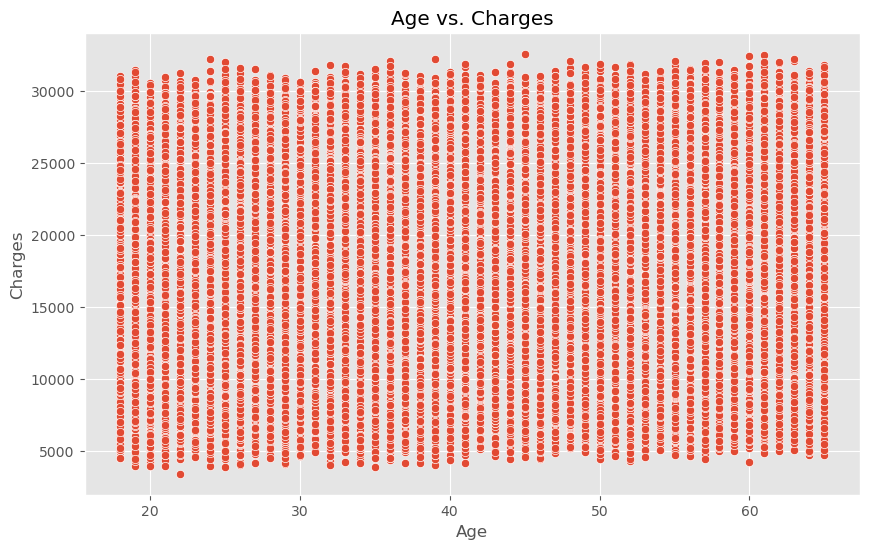

In [8]:
# Age vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


The above scatter plot shows the relationship between the age of the policyholders and their insurance charges. 

Each point on the plot represents an individual policyholder, with their age on the x-axis and their insurance charges on the y-axis.

From the visualization, we can observe the following:

>**Wide Range of Charges:** Insurance charges vary widely across different ages, with many data points clustered at the lower end of the charges axis but some reaching as high as approximately 60,000.

>**No Clear Linear Trend:** There doesn’t appear to be a clear linear trend indicating that charges consistently increase or decrease with age. However, there are some indications that older policyholders might have higher charges, as there are more high-charge data points in the older age range.

>**Clusters of High Charges:** There are clusters of high charges at various ages, suggesting that factors other than age might also significantly influence insurance charges.

Overall, while age does seem to have some impact on insurance charges, it is likely not the sole determining factor. Other variables such as BMI, smoking status, occupation, and medical history might also play crucial roles in determining the cost of insurance premiums. Further analysis and visualizations of these factors will help us gain a more comprehensive understanding.

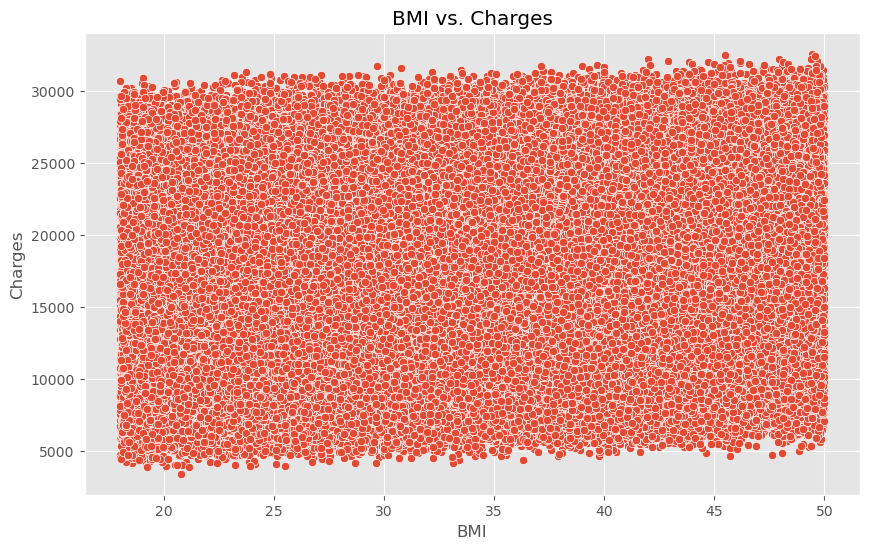

In [9]:
#BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


The above scatter plot illustrates the relationship between the Body Mass Index (BMI) of policyholders and their insurance charges. 

Each point on the plot represents an individual policyholder, with their BMI on the x-axis and their insurance charges on the y-axis.

From the visualization, we can observe the following:

>**Wide Range of Charges:** Similar to the age vs. charges plot, insurance charges vary widely across different BMI values, with many data points clustered at the lower end of the charges axis but some reaching as high as approximately 60,000.

>**Potential Positive Correlation:** There appears to be a slight upward trend, suggesting that higher BMI values might be associated with higher insurance charges. This could be due to the increased health risks associated with higher BMI, leading to higher medical costs and, consequently, higher insurance premiums.

>**Clusters of High Charges:** There are clusters of high charges at various BMI levels, indicating that while BMI is a significant factor, other variables might also play crucial roles in determining insurance charges.

Overall, the scatter plot suggests that BMI has an impact on insurance charges, with higher BMI potentially leading to higher costs. However, the relationship is not perfectly linear, and other factors such as age, smoking status, occupation, and medical history should also be considered to gain a comprehensive understanding of the determinants of insurance premiums.

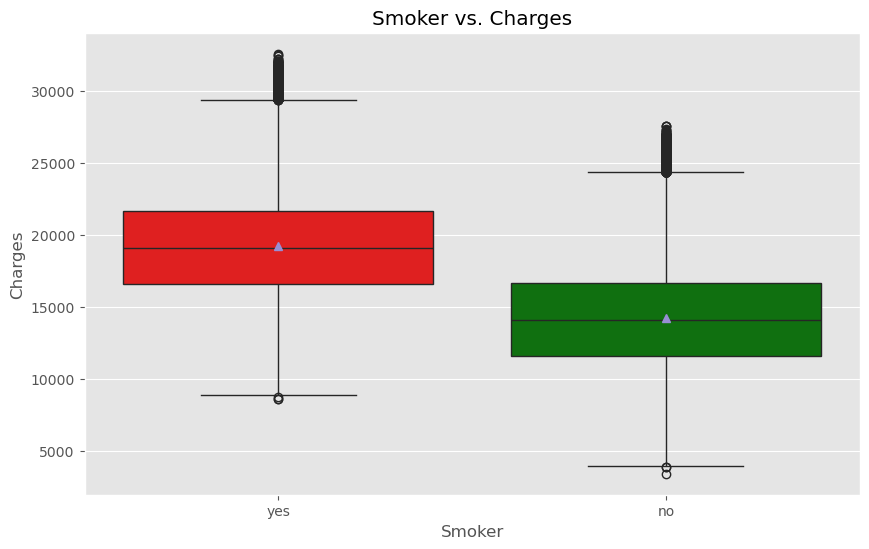

In [18]:
#Smoker vs. Charges

colors = {'yes': 'red', 'no': 'green'}

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='smoker',
    y='charges',
    data=df,
    showmeans=True,  
    hue='smoker',  
    palette=colors  
)
plt.title('Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


The above box plot compares the insurance charges for smokers and non-smokers. 

The x-axis represents the smoking status (‘yes’ for smokers and ‘no’ for non-smokers), while the y-axis represents the insurance charges.

From the visualization, we can observe the following:

>**Higher Median Charges for Smokers:** The median insurance charges for smokers are significantly higher than for non-smokers. This is evident from the higher position of the box plot for smokers compared to non-smokers.

>**Wider Range of Charges for Smokers:** The range of insurance charges for smokers is also wider, indicating greater variability in charges. This could be due to the increased health risks and associated medical costs for smokers.

>**Outliers:** There are several outliers in the charges for both smokers and non-smokers, but more so for smokers. These outliers represent policyholders with exceptionally high insurance charges, likely due to severe health conditions.

Overall, this visualization clearly indicates that smoking status has a significant impact on insurance charges, with smokers facing higher costs. This is consistent with the understanding that smoking increases health risks, leading to higher medical expenses and, consequently, higher insurance premiums.

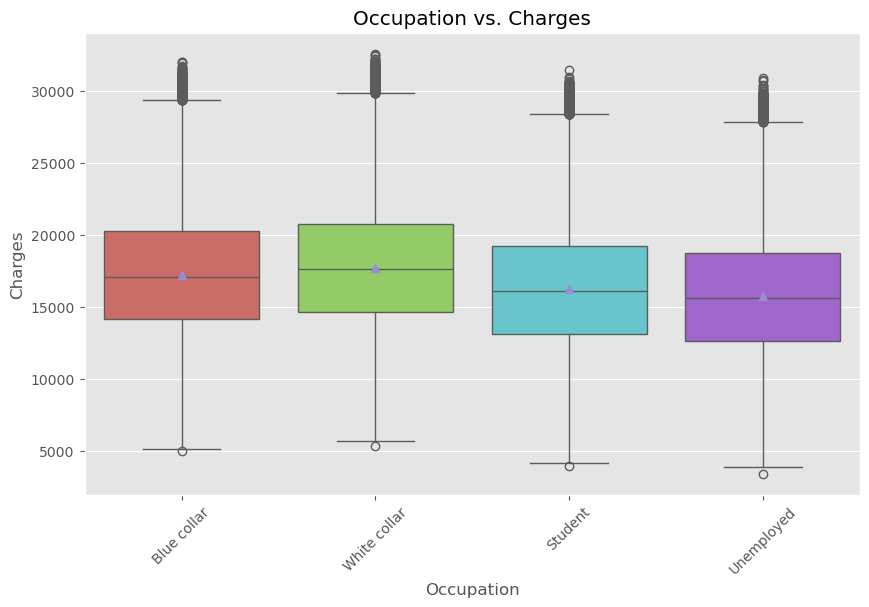

In [20]:
# Occupation vs. Charges
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='occupation',
    y='charges',
    hue='occupation',  
    legend=False,  
    showmeans=True,  
    palette='hls',  
    data=df
)
plt.title('Occupation vs. Charges')
plt.xlabel('Occupation')
plt.ylabel('Charges')
plt.xticks(rotation=45)  
plt.show()


The above box plot displays the distribution of insurance charges across different occupations. The x-axis represents various occupations, while the y-axis represents the insurance charges.

From the visualization, we can observe the following:

>**Variation in Charges Across Occupations:** Different occupations show varying ranges of insurance charges. This indicates that occupation is a significant factor influencing insurance costs.

>**Median Charges:** Each box plot shows the median charge for each occupation. Some occupations have higher median charges compared to others, suggesting that certain job types might be associated with higher health risks and consequently higher insurance premiums.

>**Range and Outliers:** The spread of the boxes and the presence of whiskers indicate the variability in charges within each occupation. Outliers are represented by individual points beyond the whiskers, showing exceptionally high charges for some individuals within certain occupations.

Overall, this visualization highlights that occupation plays a crucial role in determining insurance charges. Certain occupations might have higher associated health risks, leading to higher insurance costs. This insight can help insurers in pricing their policies more accurately based on the policyholder’s occupation.

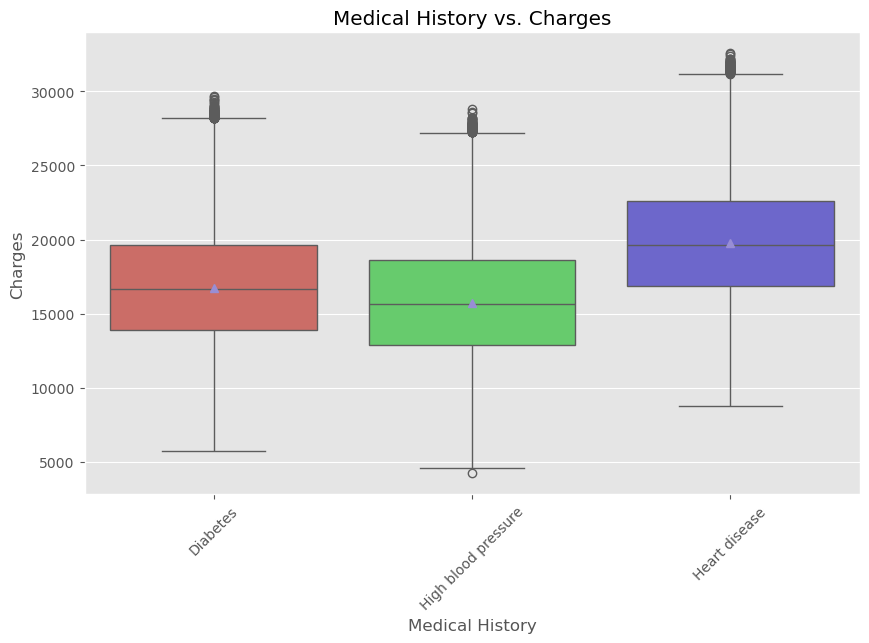

In [25]:
# Medical history vs. Charges
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='medical_history',
    y='charges',
    hue='medical_history', 
    legend = False ,
    showmeans = True ,
    data=df,
    palette='hls'
)
plt.title('Medical History vs. Charges')
plt.xlabel('Medical History')
plt.ylabel('Charges')
plt.xticks(rotation=45) 
plt.show()


The box plot titled “Medical History vs. Charges” displays the distribution of insurance charges across different medical history categories. 

The x-axis represents various medical conditions (e.g., Diabetes, Heart Disease, High Blood Pressure), while the y-axis represents the insurance charges.

From the visualization, we can observe the following:

>**Variation in Charges Across Medical Conditions:** Different medical conditions show varying ranges of insurance charges. This indicates that medical history is a significant factor influencing insurance costs.

>**Median Charges:** Each box plot shows the median charge for each medical condition. Some conditions, such as Heart Disease, have higher median charges compared to others, suggesting that certain medical histories might be associated with higher health risks and consequently higher insurance premiums.

>**Range and Outliers:** The spread of the boxes and the presence of whiskers indicate the variability in charges within each medical condition. Outliers are represented by individual points beyond the whiskers, showing exceptionally high charges for some individuals with certain medical conditions.

Overall, this visualization highlights that medical history plays a crucial role in determining insurance charges. Certain medical conditions might have higher associated health risks, leading to higher insurance costs. This insight can help insurers in pricing their policies more accurately based on the policyholder’s medical history.

## Data Preparation

In this data preparation step, we handled missing values by filling them with appropriate statistics, encoded categorical variables using one-hot encoding, and scaled numerical features to ensure they are on a similar scale. This prepared dataset is now ready for analysis and modeling.

In [28]:
# Check for missing values
df.isnull().sum()

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64

In [31]:
# Fill missing values for 'medical_history' and 'family_medical_history' with the mode
df['medical_history'].fillna(df['medical_history'].mode()[0], inplace=True)
df['family_medical_history'].fillna(df['family_medical_history'].mode()[0], inplace=True)

In [36]:
# Check for missing values after adjustments
df.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

Since all other columns had zero missing values, we only needed to address the missing values in the `medical_history` and `family_medical_history` columns. 

Any missing values in the `medical_history` and `family_medical_history` columns are filled with the most frequent value (mode) for each respective column.

This adjustment will help maintain the integrity of our dataset for further analysis and modeling.

In [37]:
# Define categorical features
categorical_features = ['gender', 'smoker', 'region', 'medical_history', 'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level']

# Apply one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')

df_encoded = preprocessor.fit_transform(df)

In [38]:
# Define numerical features
numerical_features = ['age', 'bmi', 'children', 'charges']

# Apply standard scaling
scaler = StandardScaler()
df_encoded[:, -len(numerical_features):] = scaler.fit_transform(df_encoded[:, -len(numerical_features):])

## Data Modeling

In [47]:
# Splitting the data into training and testing sets
X = df_encoded
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Baseline model

In [48]:
# Baseline model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_pred_baseline)

print(f'Baseline Model MSE: {baseline_mse}')

# Residuals
residuals_baseline = y_test - y_pred_baseline

Baseline Model MSE: 0.2658925509109957


#### Plots for baseline model

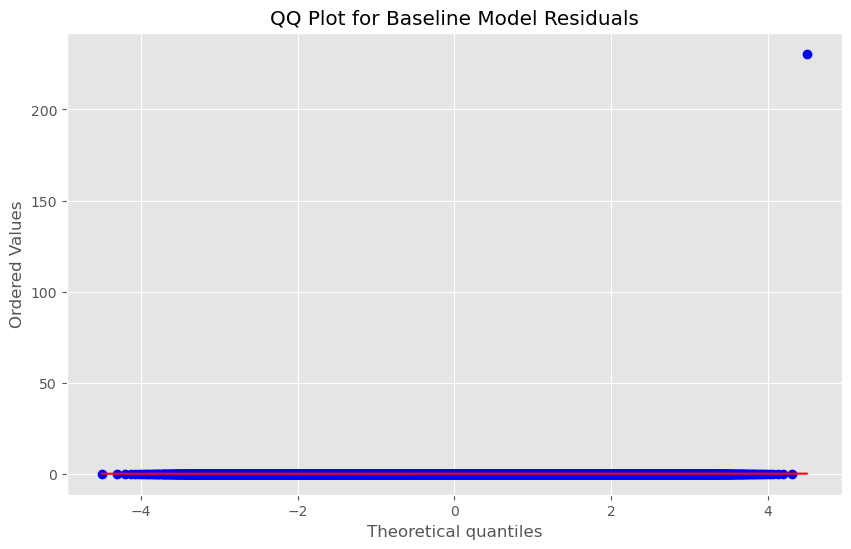

In [49]:
# QQ plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_baseline, dist="norm", plot=plt)
plt.title('QQ Plot for Baseline Model Residuals')
plt.show()

The QQ plot for the baseline model residuals compares the distribution of the residuals (differences between actual and predicted values) to a normal distribution. In this plot:

>**Straight Line:** Most of the points lie on a straight line, indicating that the residuals are approximately normally distributed. This is a good sign, as many regression models assume normally distributed residuals.

>**Outlier:** There is one point at the far right end that deviates significantly from the line, suggesting a potential outlier in the data. This outlier indicates that there might be some extreme values that the model didn’t predict well.

Overall, the QQ plot suggests that the residuals of the baseline model are mostly normally distributed, with a few exceptions.

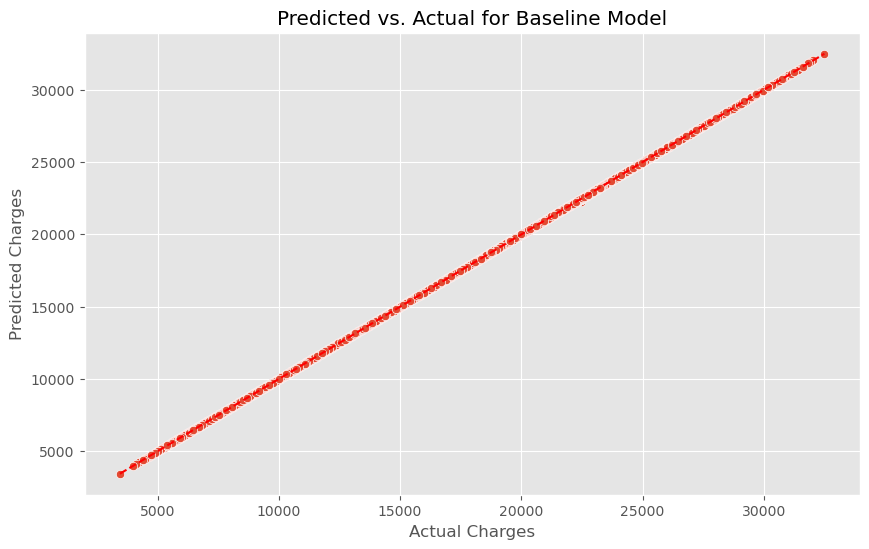

In [50]:
# Predicted vs. Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_baseline)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs. Actual for Baseline Model')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

### Un-tuned model

In [ ]:
# Un-tuned Random Forest model
untuned_model = RandomForestRegressor(random_state=42)
untuned_model.fit(X_train, y_train)
y_pred_untuned = untuned_model.predict(X_test)
untuned_mse = mean_squared_error(y_test, y_pred_untuned)

print(f'Un-tuned Model MSE: {untuned_mse}')

# Residuals
residuals_untuned = y_test - y_pred_untuned

#### Plots for un-tuned model

In [ ]:
# QQ plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals_untuned, dist="norm", plot=plt)
plt.title('QQ Plot for Un-tuned Model Residuals')
plt.show()

# Predicted vs. Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_untuned)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs. Actual for Un-tuned Model')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()